In [ ]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

data_home = 'https://github.com/dknife/ML/raw/main/data/'
lin_data = pd.read_csv(data_home+'pollution.csv')
lin_data

,input,pollution
0,0.240557,4.858750
1,0.159731,4.471091
2,0.108295,4.341897
3,0.233770,3.586844
4,0.283235,3.678243
...,...,...
95,0.070824,4.851617
96,0.055300,4.912696
97,0.138229,5.516441
98,0.007205,5.661260


**독립변수(input)와 종속변수(pollution) 설정**

In [ ]:
x = lin_data.iloc[:,:1]
y = lin_data.iloc[:,1:]

**MSE를 비용함수로 둔 선형회귀모델 구현**

200 번째 파라미터: w = -0.2092, b = 4.0531
200 번째 MSE: 0.6715
400 번째 파라미터: w = -1.5231, b = 4.3932
400 번째 MSE: 0.4854
600 번째 파라미터: w = -2.4388, b = 4.6303
600 번째 MSE: 0.3951
800 번째 파라미터: w = -3.0769, b = 4.7955
800 번째 MSE: 0.3512
1000 번째 파라미터: w = -3.5217, b = 4.9107
1000 번째 MSE: 0.3299


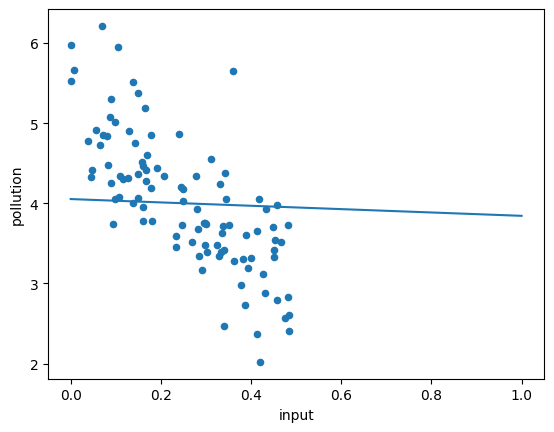

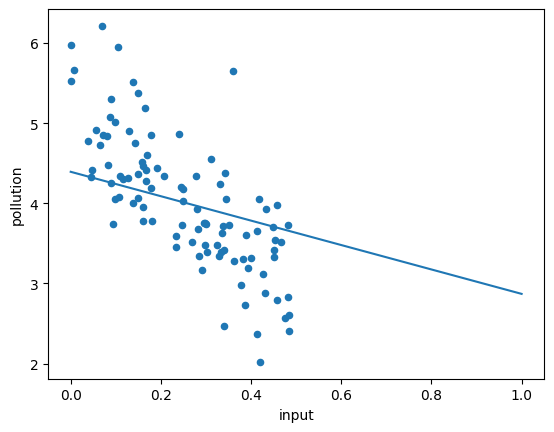

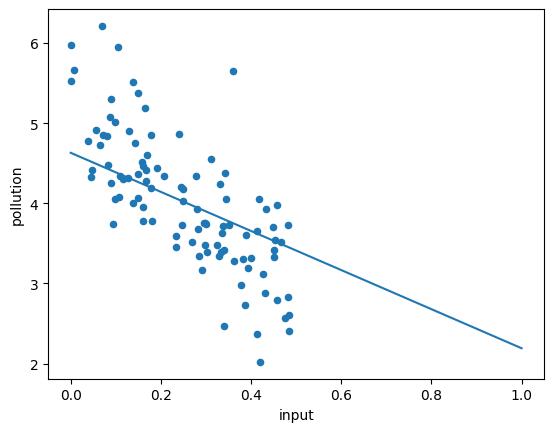

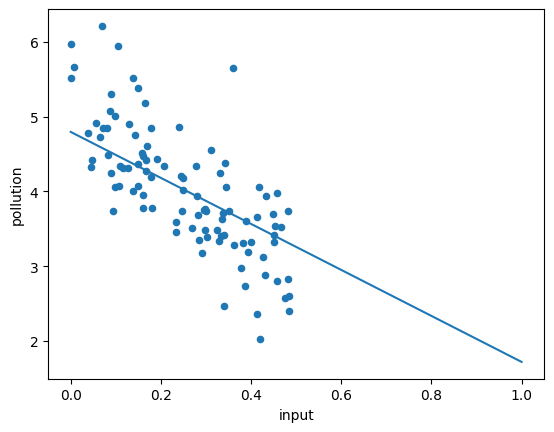

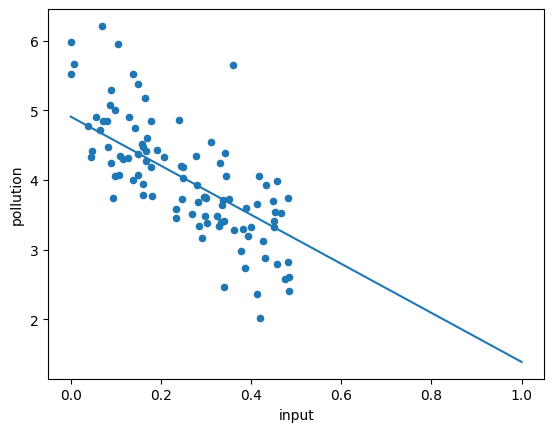

In [ ]:
def h(x, param):
  return param[0] * x + param[1]

# MSE 계산 함수
def mse(x, y, param):
    m = len(y)
    error = h(x, param) - y
    return (1 / m) * np.sum(error ** 2)

learning_iteration = 1000  #반복횟수 1000회
learning_rate = 0.1  # 학습율 0.1

param = [1.0,1.0]  # w,b = 1.0

for i in range(1,learning_iteration+1):
  if i % 200 == 0:
    lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')
    plt.plot([0, 1], [h(0, param), h(1, param)])
    print(i,f"번째 파라미터: w = {param[0]:.4f}, b = {param[1]:.4f}")
    print(i,f"번째 MSE: {mse(x, y, param):.4f}")
  error = ( h(x, param) - y)
  param[0] -= learning_rate * (error * x).mean()  # w 업데이트
  param[1] -= learning_rate * error.mean()  # b 업데이트







**MAE를 비용함수로 둔 선형회귀모델 구현**

200 번째 파라미터: w = -0.0945, b = 3.9760
200 번째 MAE: 0.6557
400 번째 파라미터: w = -1.6390, b = 4.3720
400 번째 MAE: 0.5270
600 번째 파라미터: w = -2.6578, b = 4.6320
600 번째 MAE: 0.4692
800 번째 파라미터: w = -3.2416, b = 4.7840
800 번째 MAE: 0.4503
1000 번째 파라미터: w = -3.6597, b = 4.8880
1000 번째 MAE: 0.4408


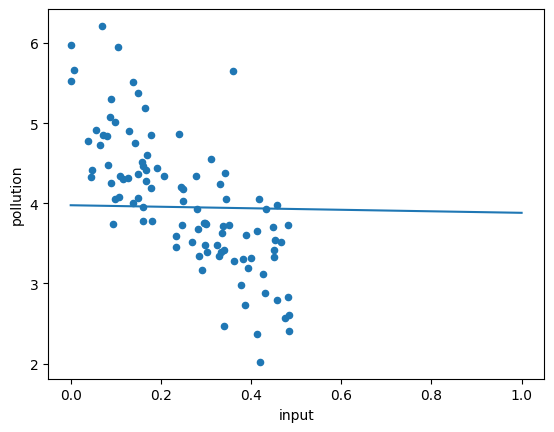

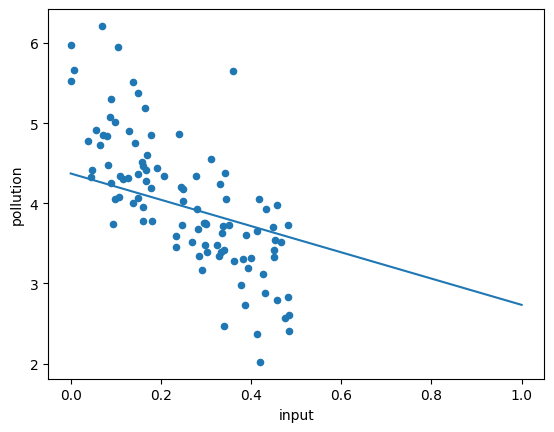

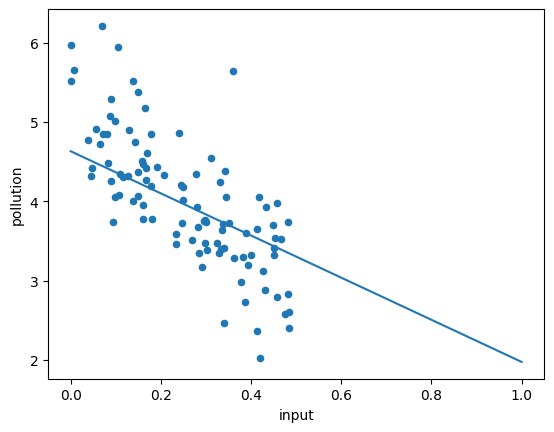

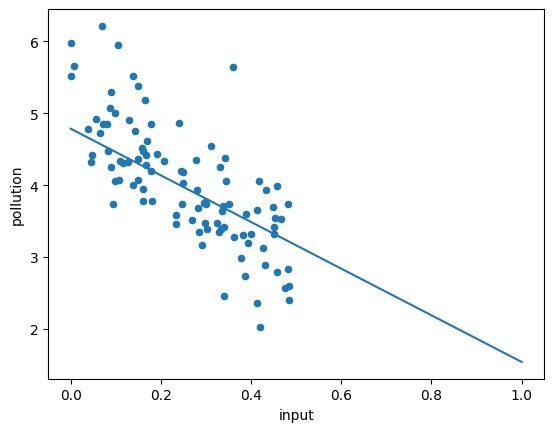

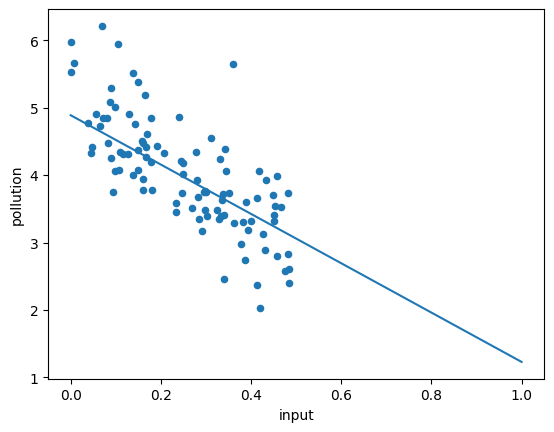

In [ ]:
def h(x, param):
  return param[0] * x + param[1]

# MAE 계산 함수
def mae(x, y, param):
    m = len(y)
    error = h(x, param) - y
    return (1 / m) * np.sum(np.abs(error))


learning_iteration = 1000  #반복횟수 1000회
learning_rate = 0.1  # 학습율 0.1

param = [1.0,1.0]  # w,b = 1.0

for i in range(1, learning_iteration+1):
  if i % 200 == 0:
    lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')
    plt.plot([0, 1], [h(0, param), h(1, param)])
    print(i,f"번째 파라미터: w = {param[0]:.4f}, b = {param[1]:.4f}")
    print(i,f"번째 MAE: {mae(x, y, param):.4f}")
  error = ( h(x, param) - y)
  param[0] -= learning_rate * (np.sign(error) * x).mean()  # w 업데이트
  param[1] -= learning_rate * np.sign(error).mean()  # b 업데이트